In [58]:
import time
import torch
import VGPAE
from utils import get_dataloader, backtrans, imshow
from torch import nn
import matplotlib.pyplot as plt
import seaborn as sns
import VGPAE_td
import numpy as np



activFunName = 'lrelu'  # tanh used in the synthetics
activations_list = {
    'softplus': nn.Softplus(),
    'lrelu': nn.LeakyReLU(),
    'relu': nn.ReLU()
}
activFun = activations_list[activFunName]
classes = [str(i) for i in range(1,21)]


$ p(X)\geq \mathbb{E}_{q(Z_2|X)} [\log p(X|Z_2)]  - \mathbb{E}_{q(Z_1|Z_2)} [KL(q(Z_2|X)||p(Z_2|Z_1))]  - KL(q(Z_1|Z_2)||p(Z_1)) $

KL can be written as cross entropy of p, q minus entropy of q

In [2]:
activFunName = 'lrelu'  # tanh used in the synthetics
activations_list = {
    'softplus': nn.Softplus(),
    'lrelu': nn.LeakyReLU(),
    'relu': nn.ReLU()
}
activFun = activations_list[activFunName]


# load data
batch_size_train = 1000 

dataset = '1'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 10
latent_dim2 = 10
in_channel = 1


model = VGPAE.VGPAE(in_channel, latent_dim1, latent_dim2, activFun, 64)
model_file = 'models/1_VGPAE_10_10wu_w1.0_loss_function_3000.pth'
model.load_state_dict(torch.load(model_file))
model.eval();


Text(0.5, 1.0, 'Z1')

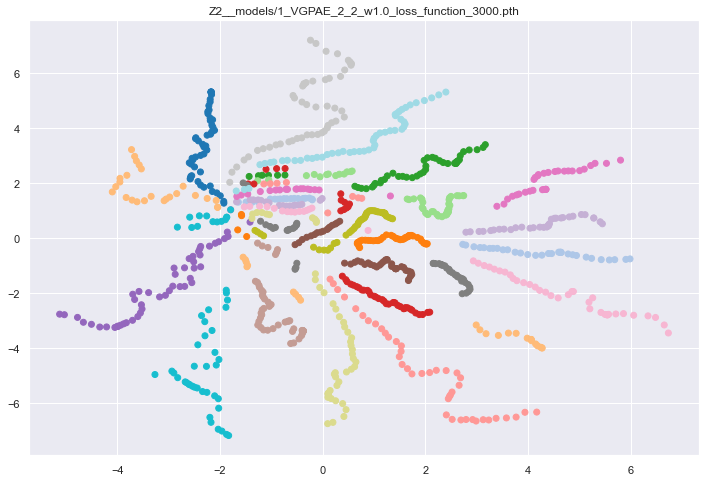

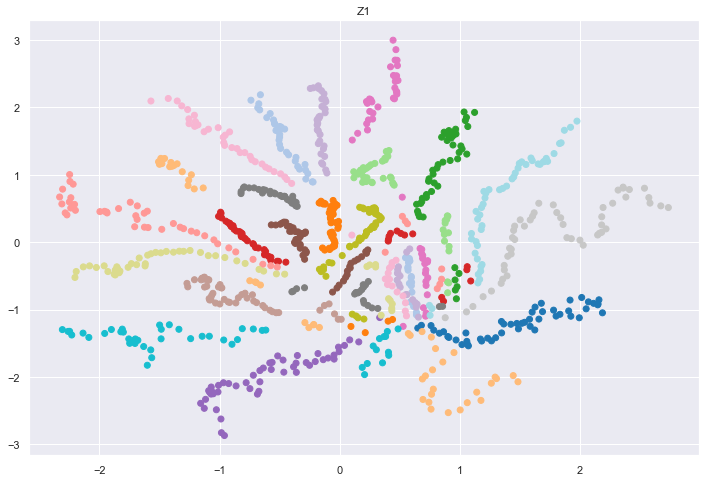

In [14]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

In [15]:
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

tensor([1.5380, 1.1267], grad_fn=<SoftplusBackward>)
tensor([[0.9404, 1.1018]], grad_fn=<ExpBackward>)
tensor([0.2973, 0.1672], grad_fn=<ExpBackward>)


<AxesSubplot:>

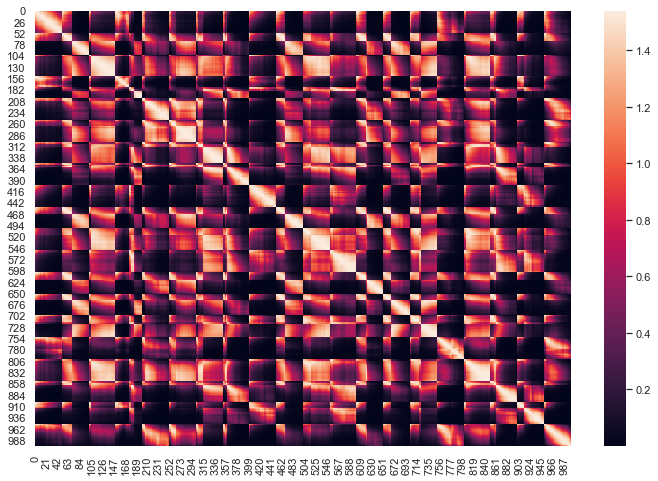

In [9]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(model.covar_module(z1_mu,z1_mu).evaluate().detach()[0])

Text(0.5, 1.0, 'Z1')

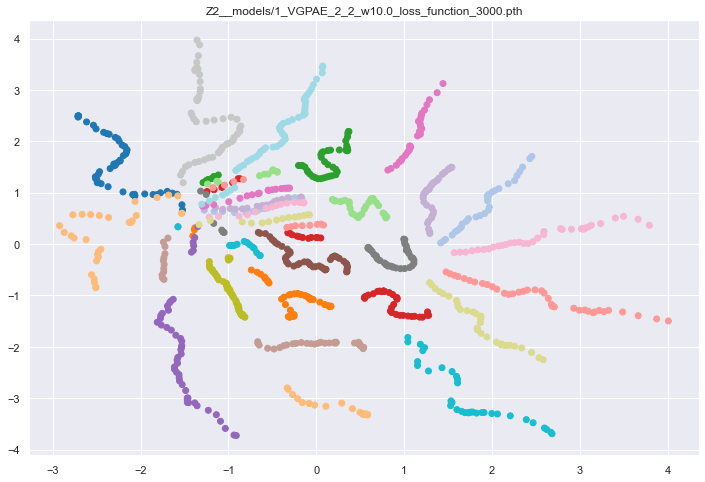

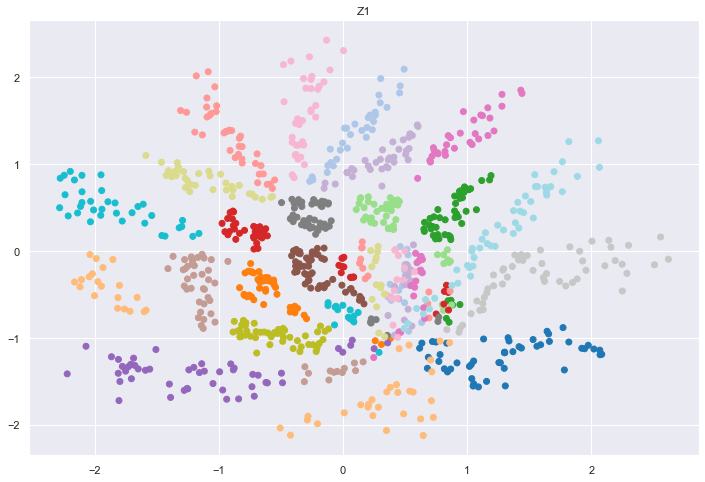

In [17]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

In [18]:
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

tensor([0.9191, 1.1249], grad_fn=<SoftplusBackward>)
tensor([[1.0177, 1.4334]], grad_fn=<ExpBackward>)
tensor([0.3127, 0.1680], grad_fn=<ExpBackward>)


<AxesSubplot:>

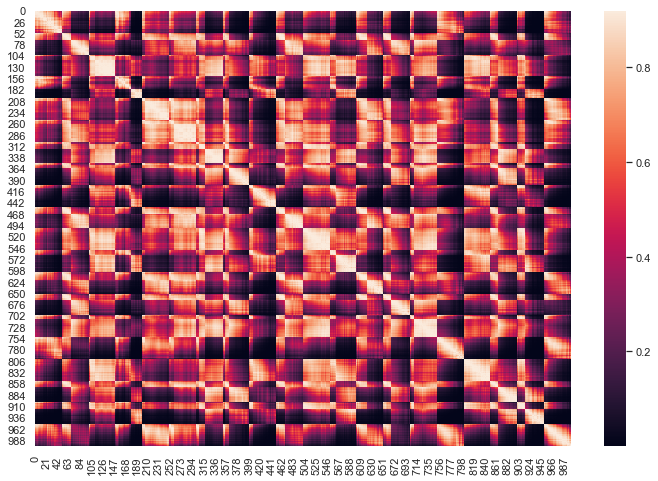

In [19]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(model.covar_module(z1_mu,z1_mu).evaluate().detach()[0])

Text(0.5, 1.0, 'Z1')

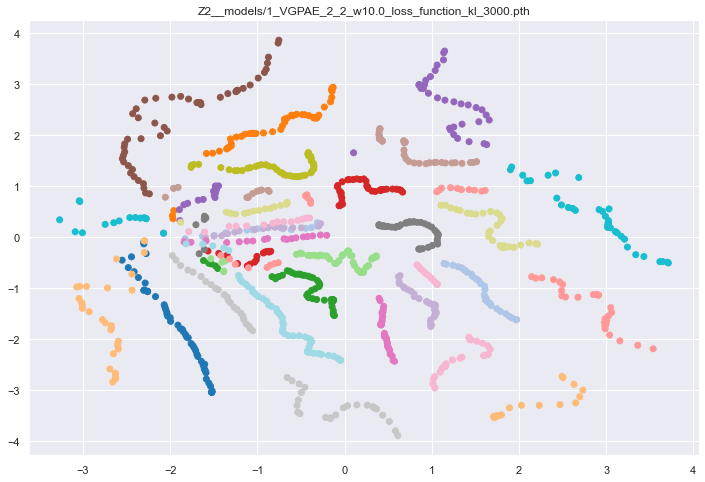

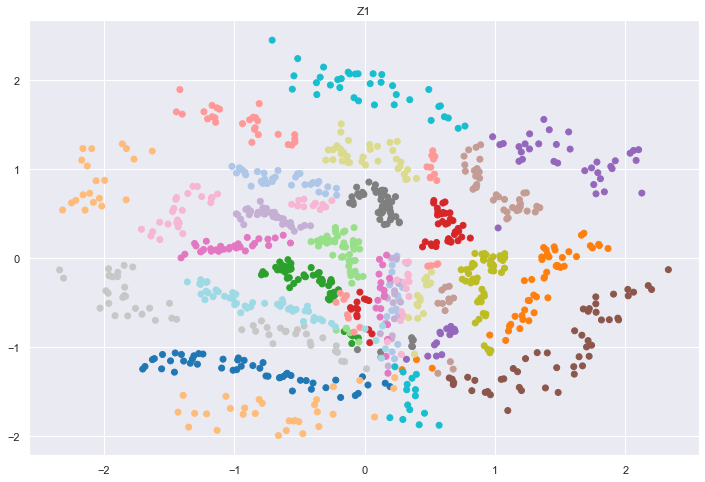

In [21]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

tensor([1.0462, 1.1268], grad_fn=<SoftplusBackward>)
tensor([[0.9641, 1.1213]], grad_fn=<ExpBackward>)
tensor([0.2802, 0.1671], grad_fn=<ExpBackward>)


<AxesSubplot:>

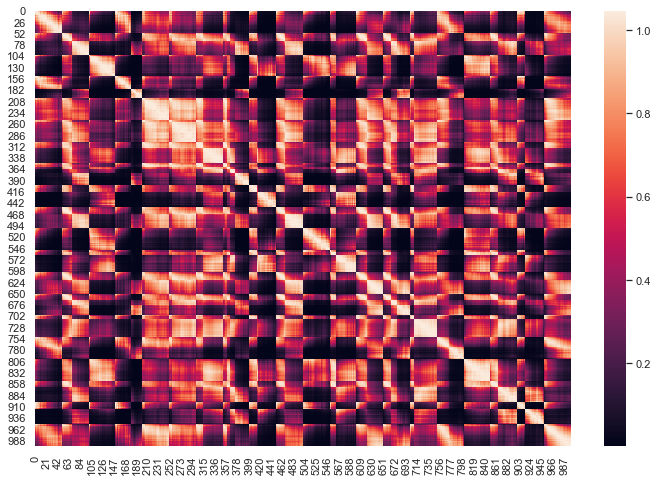

In [25]:
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(model.covar_module(z1_mu,z1_mu).evaluate().detach()[0])

Text(0.5, 1.0, 'Z1')

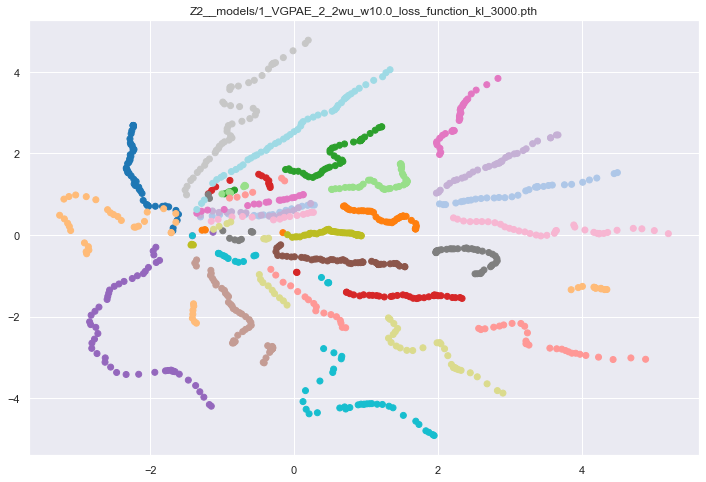

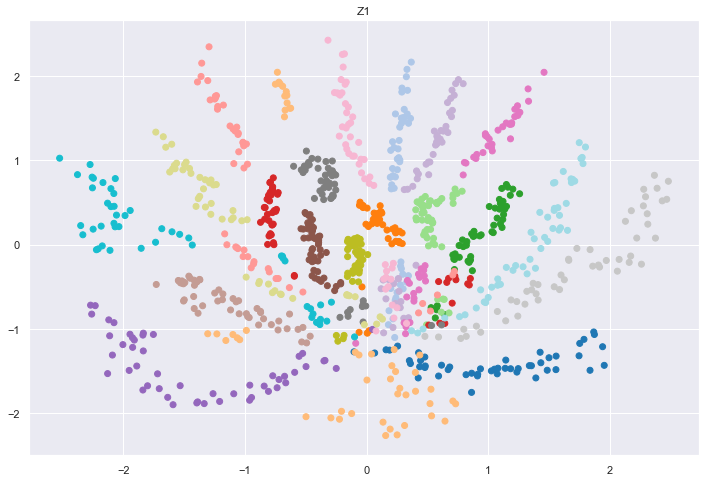

In [28]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

tensor([1.7089, 1.2692], grad_fn=<SoftplusBackward>)
tensor([[1.4529, 1.7349]], grad_fn=<ExpBackward>)
tensor([0.3128, 0.1811], grad_fn=<ExpBackward>)


<AxesSubplot:>

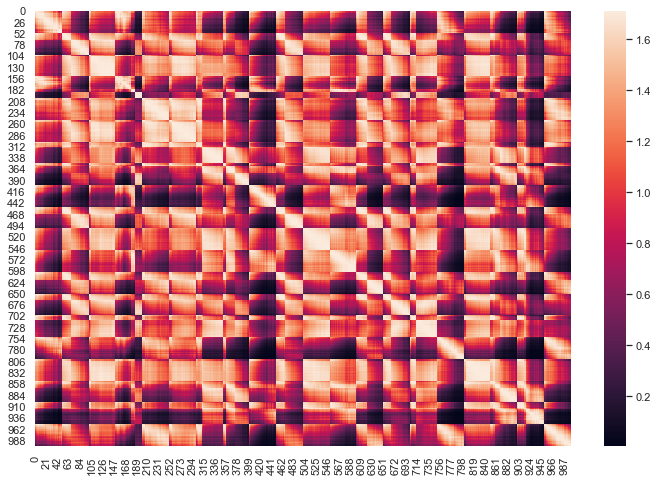

In [29]:
print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(model.covar_module(z1_mu,z1_mu).evaluate().detach()[0])

models/1_VGPAE_10_10wu_w1.0_loss_function_3000.pth
tensor([1.0146, 0.9258, 0.8397, 0.9541, 1.1127, 0.7567, 0.8727, 1.1279, 0.6770,
        0.9997], grad_fn=<SoftplusBackward>)
tensor([[4.1315, 2.2278, 1.5982, 4.3750, 1.8164, 2.0538, 3.6546, 3.9707, 4.0250,
         1.0264]], grad_fn=<ExpBackward>)
tensor([0.3318, 0.3695, 0.3715, 0.3140, 0.3703, 0.3939, 0.2718, 0.4011, 0.3375,
        0.4546], grad_fn=<ExpBackward>)


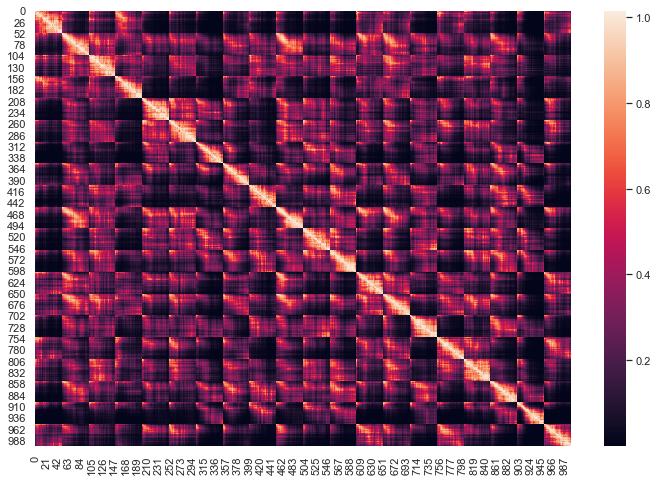

<Figure size 864x576 with 0 Axes>

In [12]:
print(model_file)
Data, Label = next(iter(train_loader))
sns.set(rc={'figure.figsize':(12,8)})

with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
sns.heatmap(model.covar_module(z1_mu,z1_mu).evaluate().detach()[0])
plt.figure()

print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

models/1_VGPAE_10_10wu_w1.0_loss_function_3000.pth
tensor([1.0146, 0.9258, 0.8397, 0.9541, 1.1127, 0.7567, 0.8727, 1.1279, 0.6770,
        0.9997], grad_fn=<SoftplusBackward>)
tensor([[4.1315, 2.2278, 1.5982, 4.3750, 1.8164, 2.0538, 3.6546, 3.9707, 4.0250,
         1.0264]], grad_fn=<ExpBackward>)
tensor([0.3318, 0.3695, 0.3715, 0.3140, 0.3703, 0.3939, 0.2718, 0.4011, 0.3375,
        0.4546], grad_fn=<ExpBackward>)


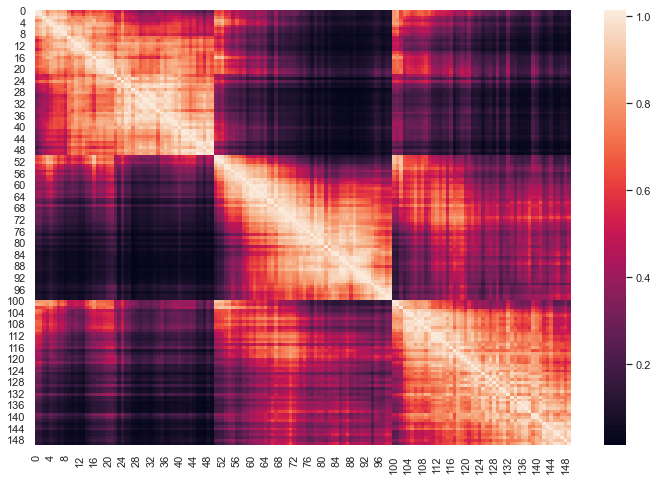

<Figure size 864x576 with 0 Axes>

In [13]:
print(model_file)
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
zero = list(*np.where(Label==0))
one = list(*np.where(Label==1))
two = list(*np.where(Label==2))
index = zero + one + two

sns.heatmap(model.covar_module(z1_mu[index],z1_mu[index]).evaluate().detach()[0])
plt.figure()

print(model.covar_module.outputscale)
print(model.covar_module.base_kernel.lengthscale)
print(model.noise)

In [60]:
activFunName = 'lrelu'  # tanh used in the synthetics
activations_list = {
    'softplus': nn.Softplus(),
    'lrelu': nn.LeakyReLU(),
    'relu': nn.ReLU()
}
activFun = activations_list[activFunName]


# load data
batch_size_train = 1000 

dataset = '1'
train_loader = get_dataloader(dataset, batch_size_train,False)
# initialize model

latent_dim1 = 2
latent_dim2 = 2
in_channel = 1


model = VGPAE.VGPAE(in_channel, latent_dim1, latent_dim2, activFun, 64)
model_file = 'models/1_VGPAE_2_2fixwu_w10.0_loss_function_3000_3.pth'
model.load_state_dict(torch.load(model_file))
model.eval();
sns.set(rc={'figure.figsize':(12,8)})


Text(0.5, 1.0, 'Z1')

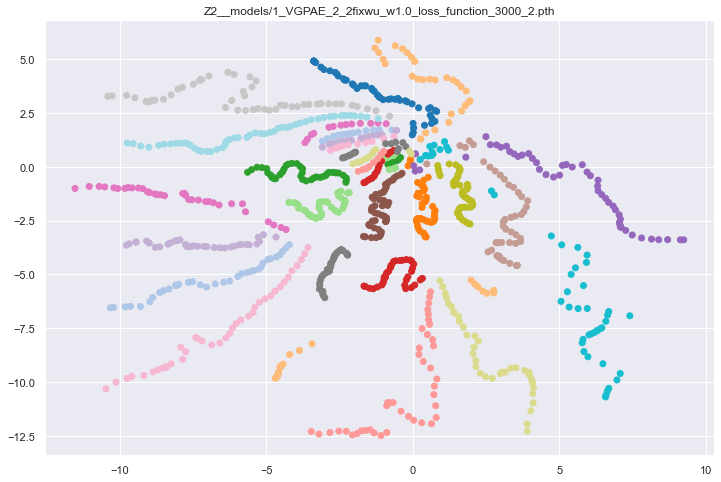

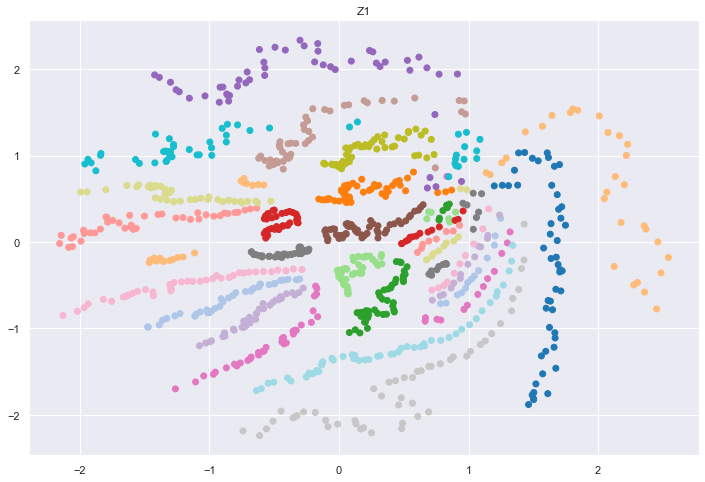

In [28]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

Text(0.5, 1.0, 'Z1')

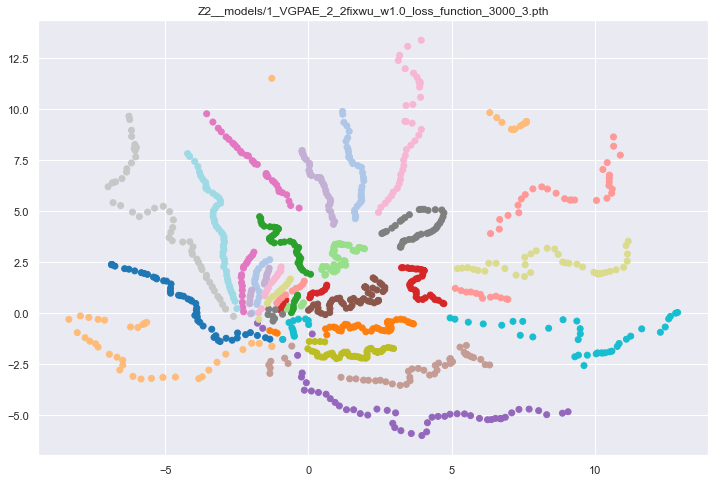

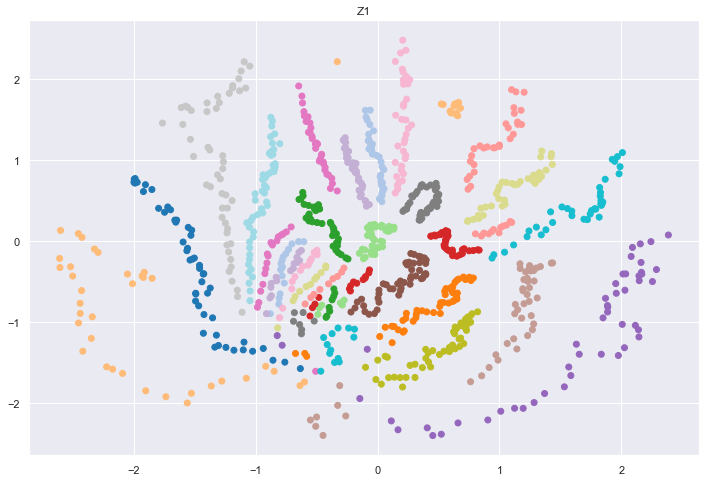

In [54]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

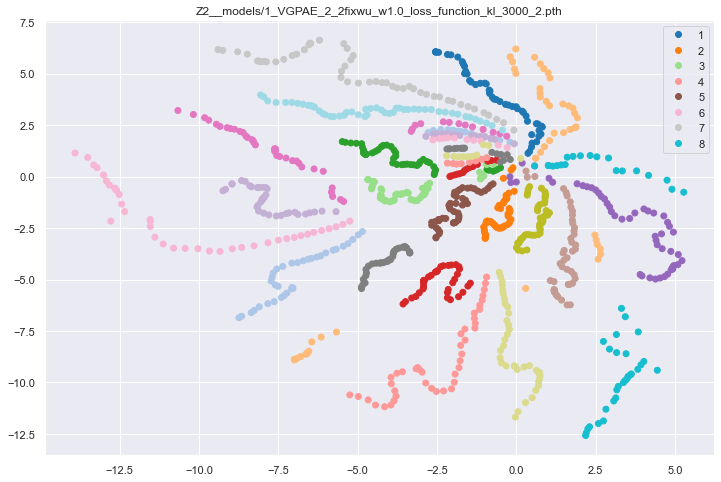

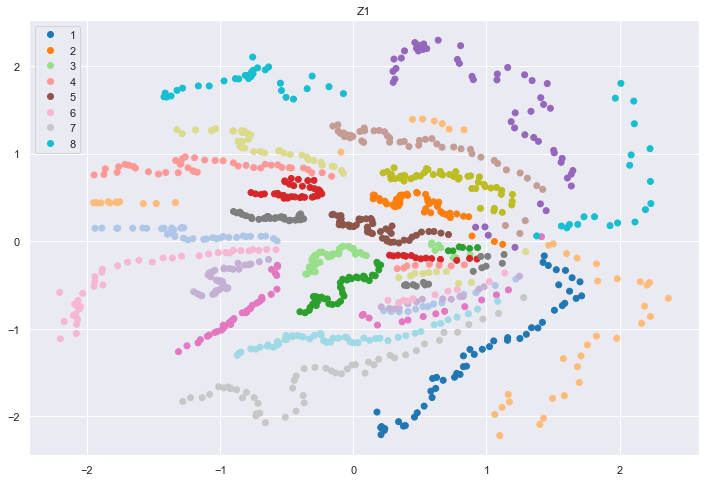

In [29]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Z2__' + model_file)
plt.figure()

scatter = plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)




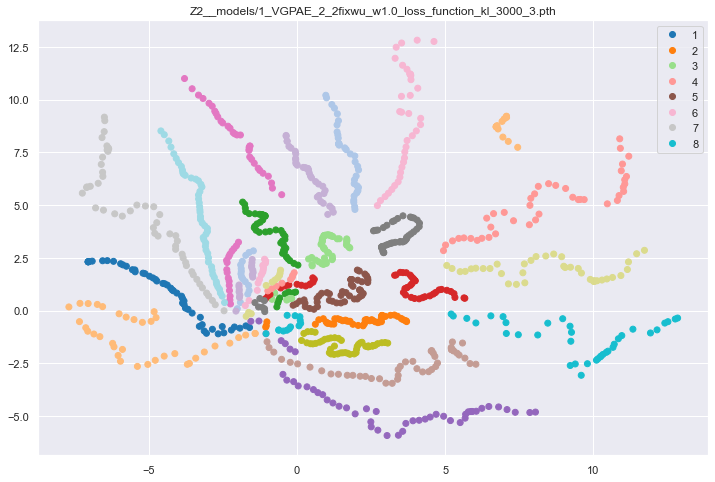

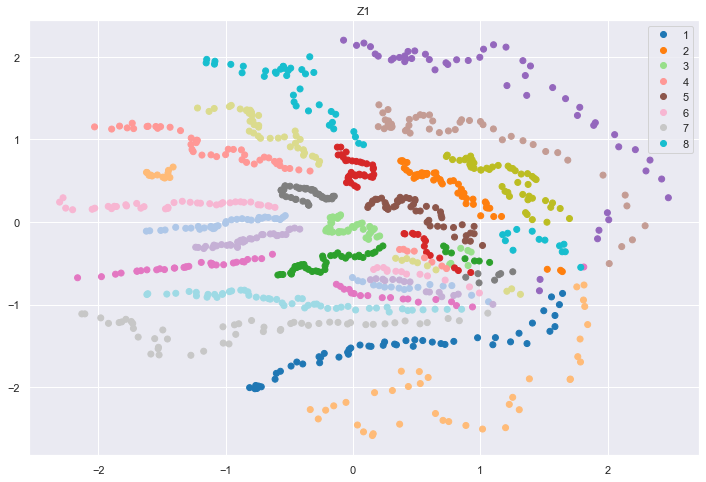

In [52]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
scatter = plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Z2__' + model_file)
plt.figure()

scatter = plt.scatter(z1_mu[:,0],z1_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z1')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)




Text(0.5, 1.0, 'Z1')

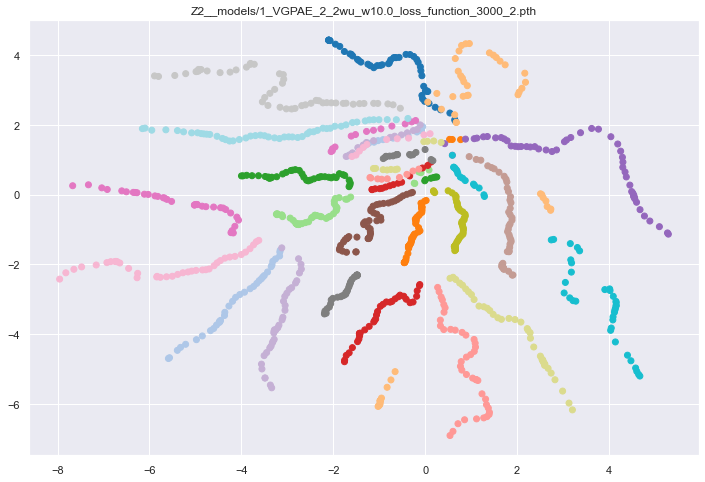

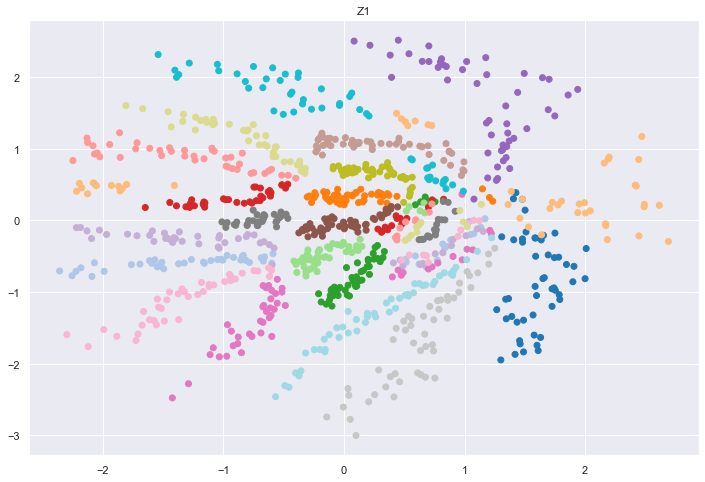

In [24]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

Text(0.5, 1.0, 'Z1')

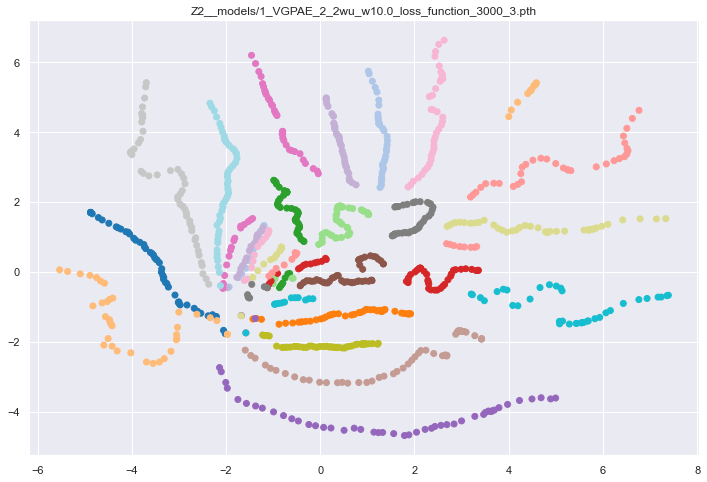

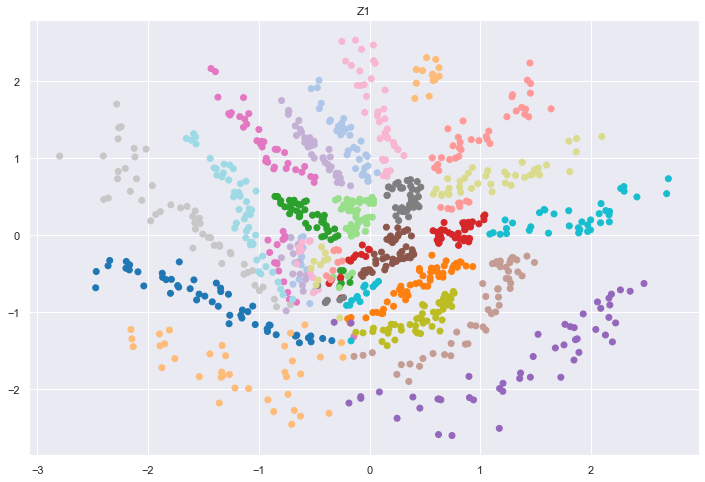

In [22]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

Text(0.5, 1.0, 'Z1')

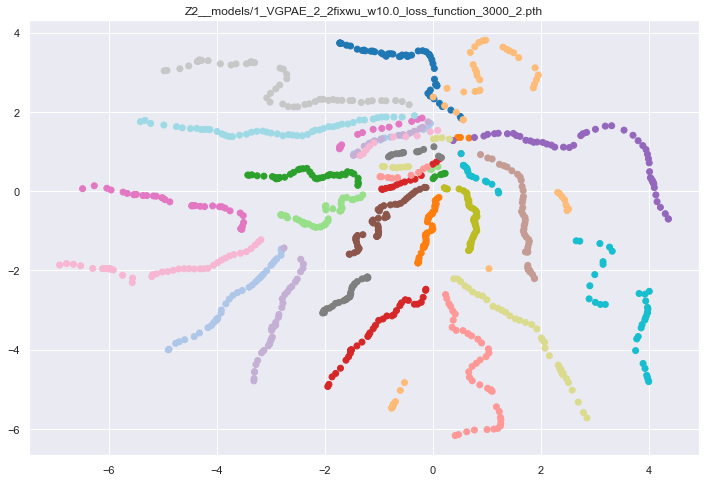

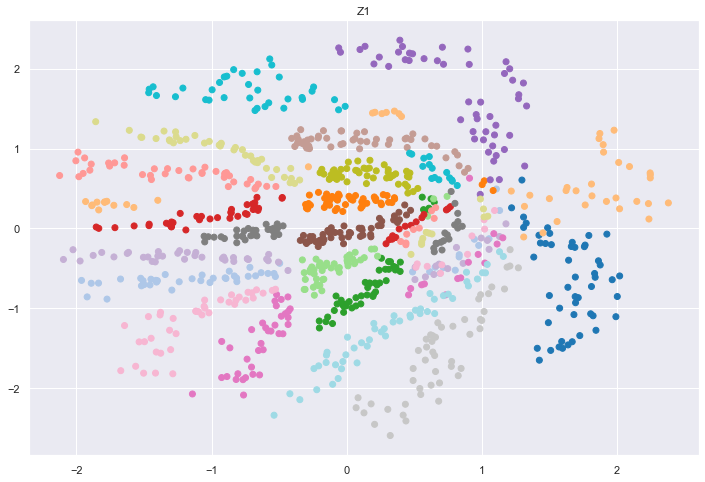

In [14]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

Text(0.5, 1.0, 'Z1')

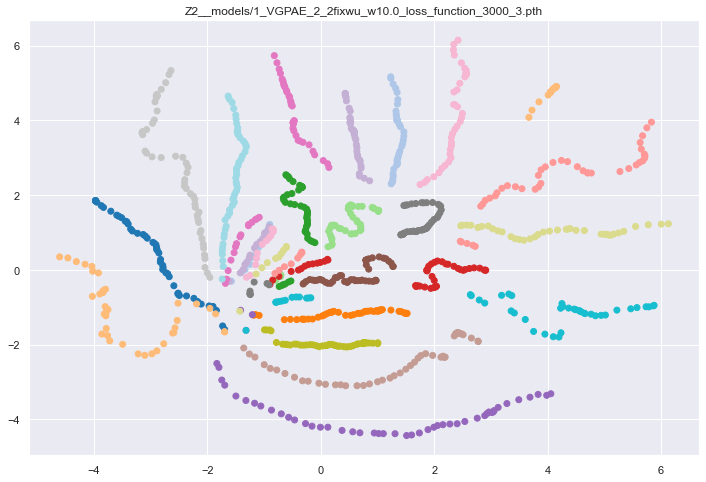

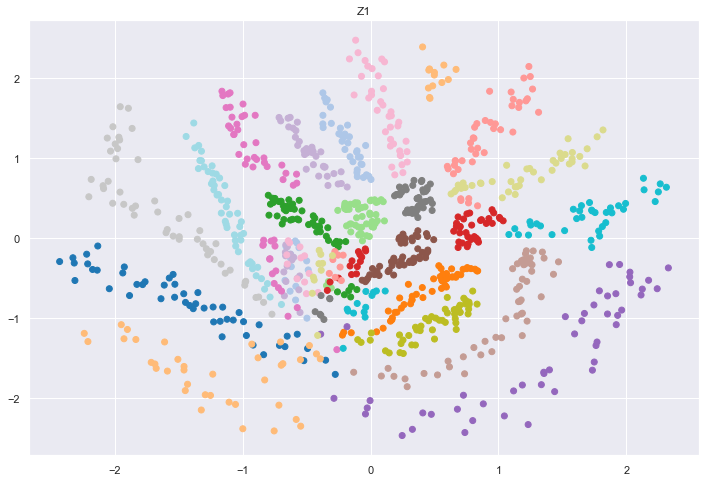

In [20]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

Text(0.5, 1.0, 'Z1')

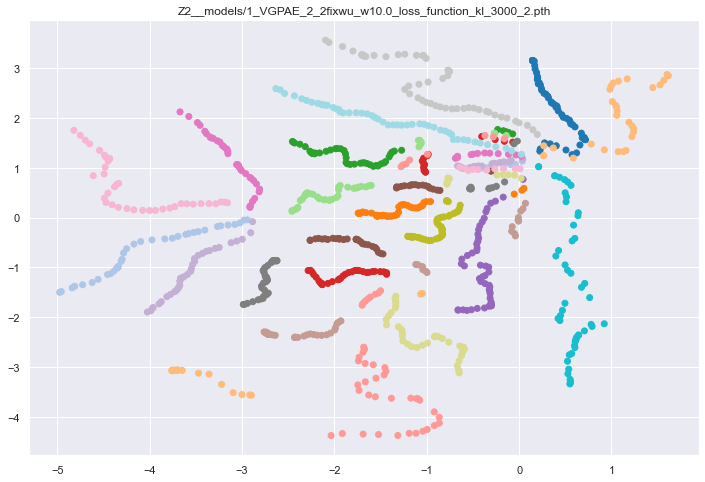

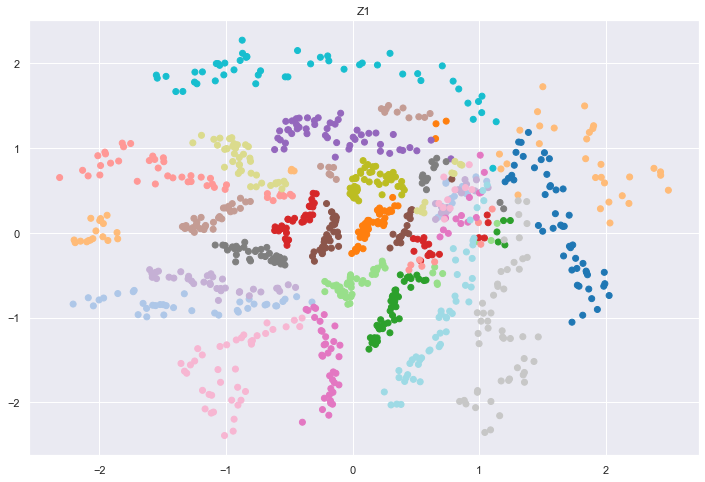

In [16]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

Text(0.5, 1.0, 'Z1')

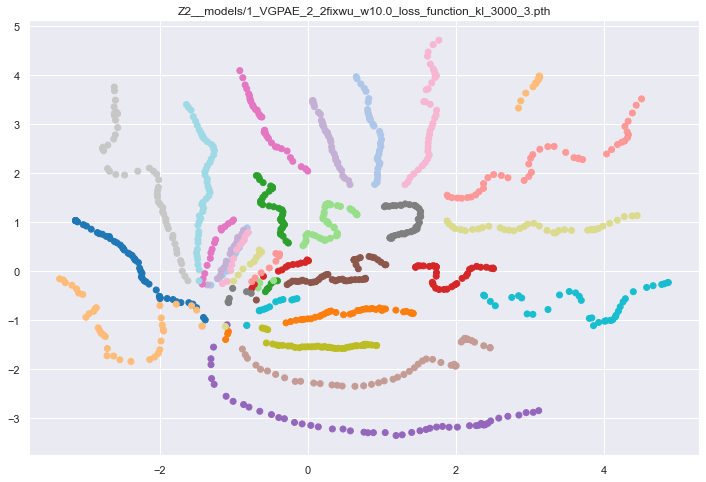

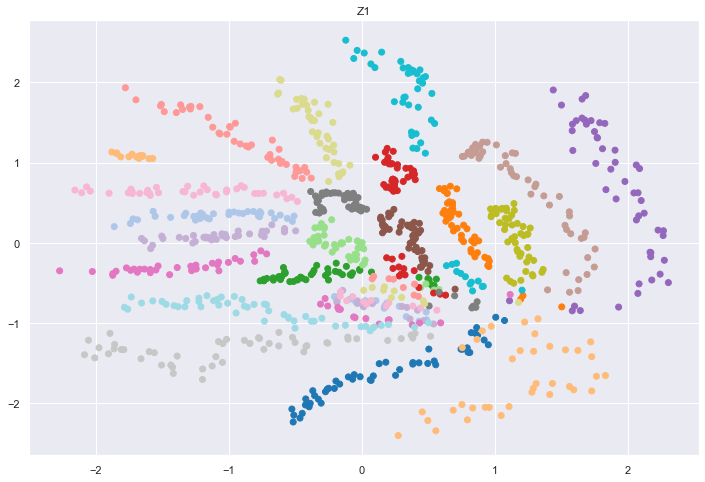

In [18]:
Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
plt.scatter(z2_mu[:,0],z2_mu[:,1],c = Label, label =Label, cmap='tab20')
plt.title('Z2__' + model_file)

plt.figure()
plt.scatter(z1_mu[:,0],z1_mu[:,1], c = Label, label =Label,cmap='tab20')
plt.title('Z1')

tensor([0.9743, 0.9900], grad_fn=<SoftplusBackward>)
tensor([[0.9999, 0.9566]], grad_fn=<ExpBackward>)
tensor([0.0950, 0.1090], grad_fn=<ExpBackward>)


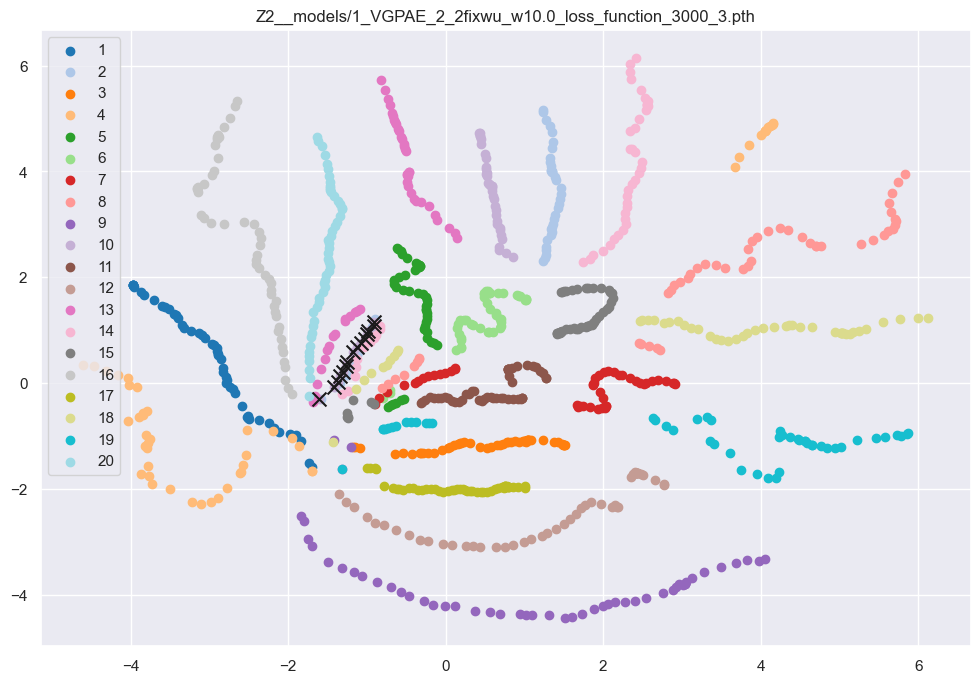

In [125]:
sns.set(rc={'figure.figsize':(12,8)})

Data, Label = next(iter(train_loader))
with torch.no_grad():
    recon, z2, z2_mu, log_z2_var, z1, z1_mu, log_z1_var= model(Data)
    
fig, ax = plt.subplots()
color = plt.cm.get_cmap('tab20',5)
for i in range(20):
    ax.scatter(z2_mu[i*50:(i+1)*50,0].numpy(),z2_mu[i*50:(i+1)*50,1].numpy(),c = np.array(cm.colors[i]).reshape(1,-1), label =np.array(cm.colors[i]).reshape(1,-1), cmap='tab20')
ax.legend(classes)
ax.title.set_text('Z2__' + model_file)


i = 9
step = 15
plt.scatter(z2_mu[i*50:i*50+step,0].numpy(),z2_mu[i*50:i*50+step,1].numpy(),c='k',s=100,marker='x')
plt.show()

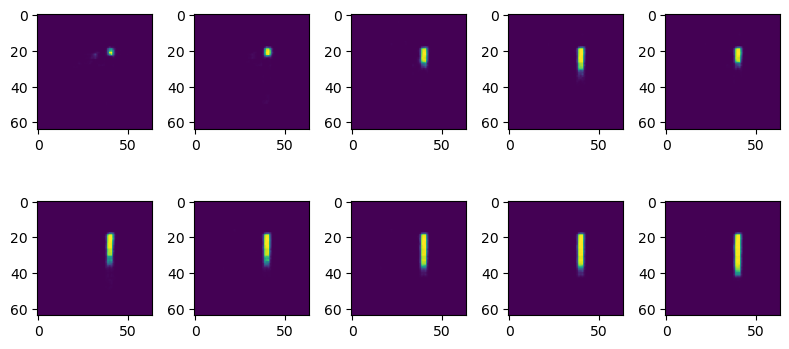

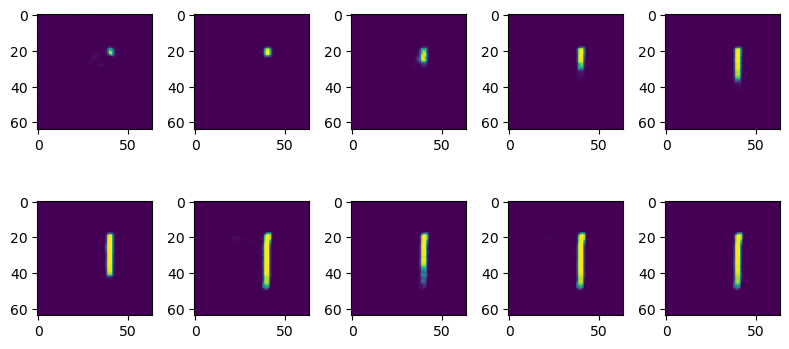

In [104]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 0
step = 10

index = [range(i*50, i*50+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_rec

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 3
step = 10

index = [range(i*50, i*50+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_rec

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()

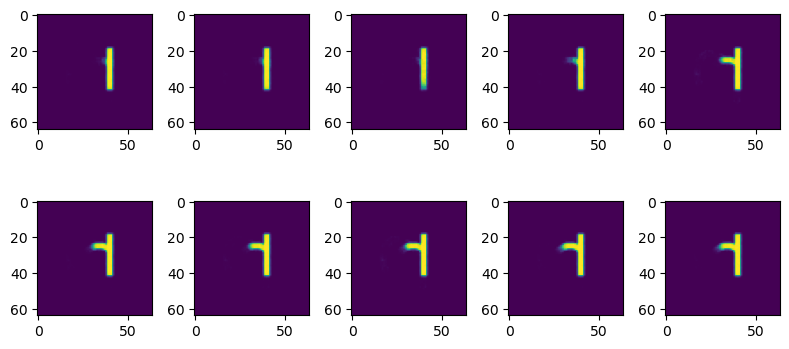

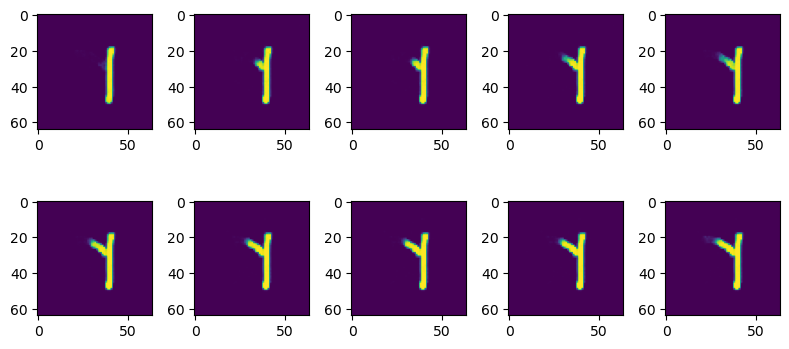

In [106]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 0
step = 10
begin = 10
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_rec

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 3
step = 10
begin = 10
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_rec

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()

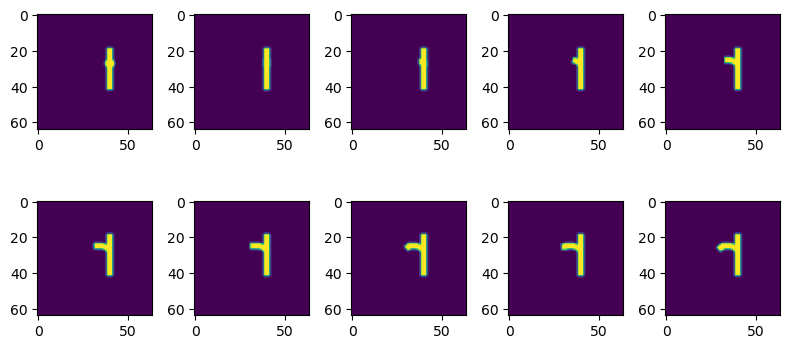

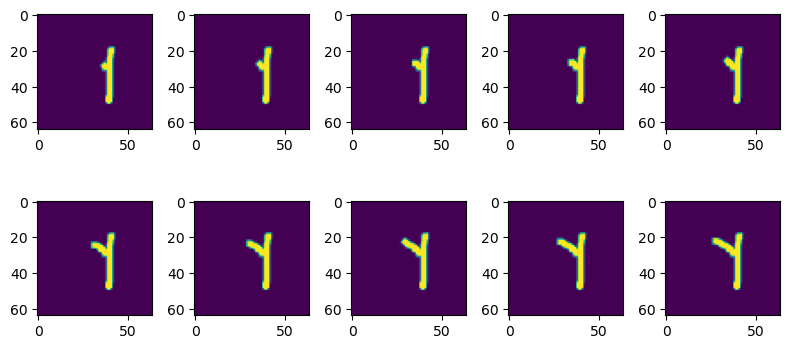

In [109]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 0
step = 10
begin = 10
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_real

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 3
step = 10
begin = 10
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_real

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()

In [127]:
plt.rcdefaults()

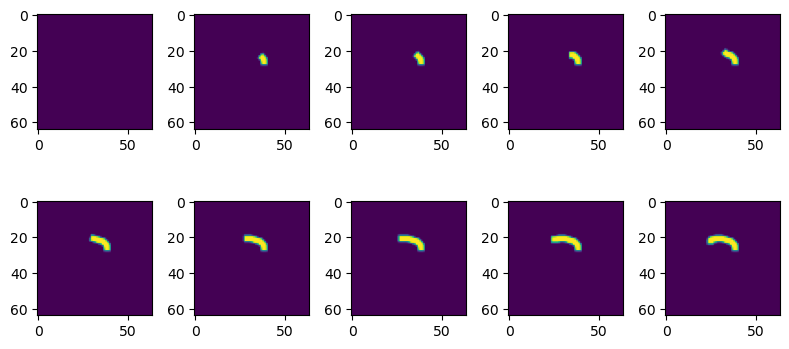

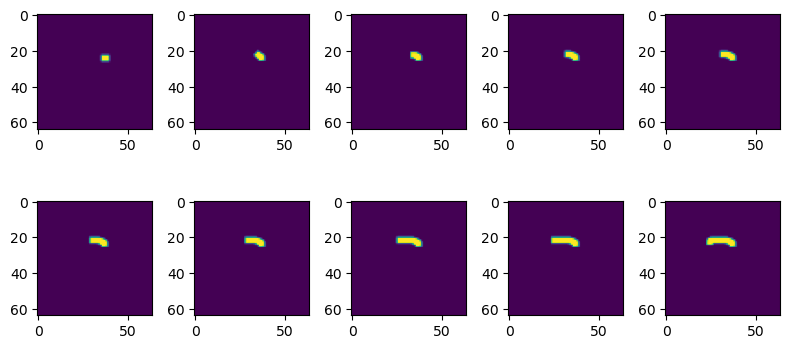

In [118]:

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 12
step = 10
begin = 0
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_real

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 9
step = 10
begin = 0
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_real

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()

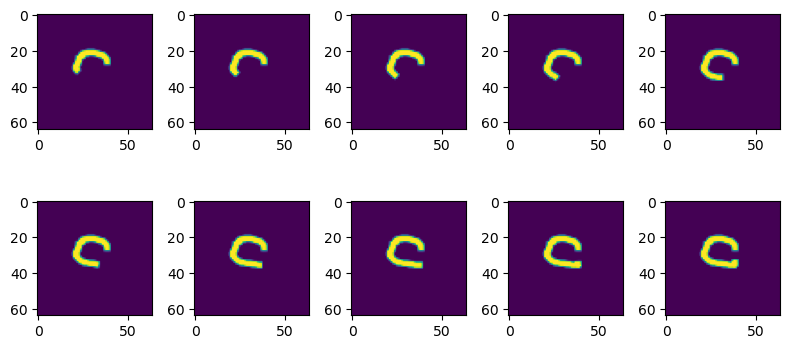

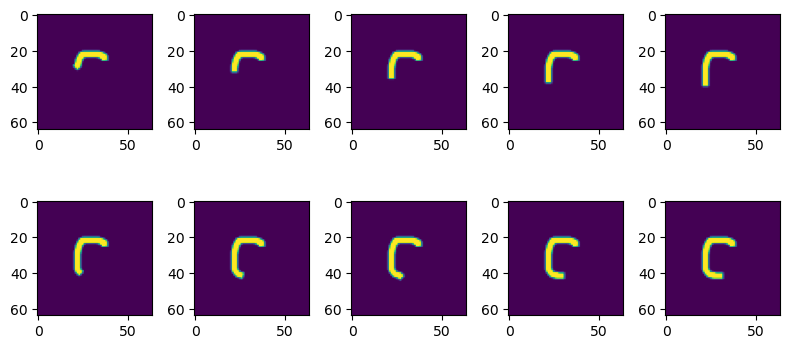

In [129]:

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 12
step = 10
begin = 15
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_real

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()


fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(8,4))
i = 9
step = 10
begin = 13
index = [range(i*50+begin, i*50+begin+step)]

img_rec = backtrans(recon[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
img_real = backtrans(Data[index],[[0.5], [0.5]]).numpy().transpose(0,2,3,1)
# img = np.concatenate([img_real,img_rec],axis=0)
img = img_real

n = 0
for ax in axs.flat:
    ax.imshow(img[n])
    n=n+1

plt.tight_layout()
plt.show()